In [1]:
! pip install git+https://github.com/theislab/scanpy.git
! pip install git+https://github.com/theislab/anndata.git
! pip install scanorama

  Cloning https://github.com/theislab/scanpy.git to /tmp/pip-req-build-mvvm2xax
  Running command git clone -q https://github.com/theislab/scanpy.git /tmp/pip-req-build-mvvm2xax
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached anndata-0.7.6-py3-none-any.whl (127 kB)
  Using cached sinfo-0.3.4-py3-none-any.whl
  Using cached umap_learn-0.5.1-py3-none-any.whl
  Using cached pynndescent-0.5.4-py3-none-any.whl
  Using cached stdlib_list-0.8.0-py3-none-any.whl (63 kB)
  Created wheel for scanpy: filename=scanpy-1.9.0.dev19+g63b42e4b-py3-none-any.whl size=11379253 sha256=e2b447f74442eaaaf10e712cc31706f7847fca93e7cbaec2089f15fef18fd9c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-738v42wh/wheels/fa/1d/fd/f4259fec8b8890a2041b93625b678dec2421df0d26c1b4d2e1
Successfully built scanpy
  Cloning https://github.com/theislab/anndata.git to /tmp/pip-req-build-zt8v

In [2]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama

In [3]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.7.dev7+g9620645
scanpy      1.9.0.dev19+g63b42e4b
sinfo       0.3.4
-----
PIL                         7.1.2
annoy                       NA
astor                       0.8.1
bottleneck                  1.3.2
cached_property             1.5.2
cffi                        1.14.6
cloudpickle                 1.3.0
cycler                      0.10.0
cython_runtime              NA
dask                        2.12.0
dateutil                    2.8.2
debugpy                     1.0.0
decorator     

In [4]:
adata_spatial_anterior = sc.datasets.visium_sge(
    sample_id = 'V1_Mouse_Brain_Sagittal_Anterior'
)

adata_spatial_posterior = sc.datasets.visium_sge(
    sample_id = 'V1_Mouse_Brain_Sagittal_Posterior'
)

  0%|          | 0.00/8.81M [00:00<?, ?B/s]

  0%|          | 0.00/19.6M [00:00<?, ?B/s]

reading /content/data/V1_Mouse_Brain_Sagittal_Anterior/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  0%|          | 0.00/9.26M [00:00<?, ?B/s]

  0%|          | 0.00/20.1M [00:00<?, ?B/s]

reading /content/data/V1_Mouse_Brain_Sagittal_Posterior/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
adata_spatial_anterior.var_names_make_unique()
adata_spatial_posterior.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata_spatial_anterior, inplace=True)
sc.pp.calculate_qc_metrics(adata_spatial_posterior, inplace=True)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

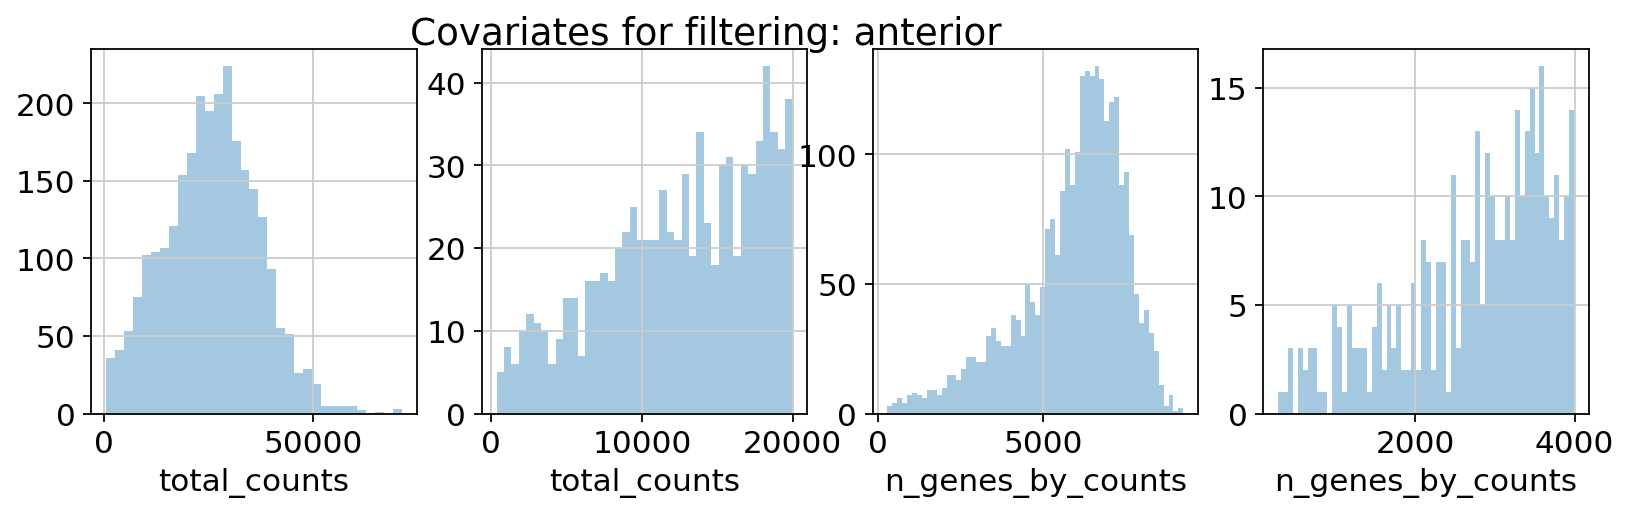

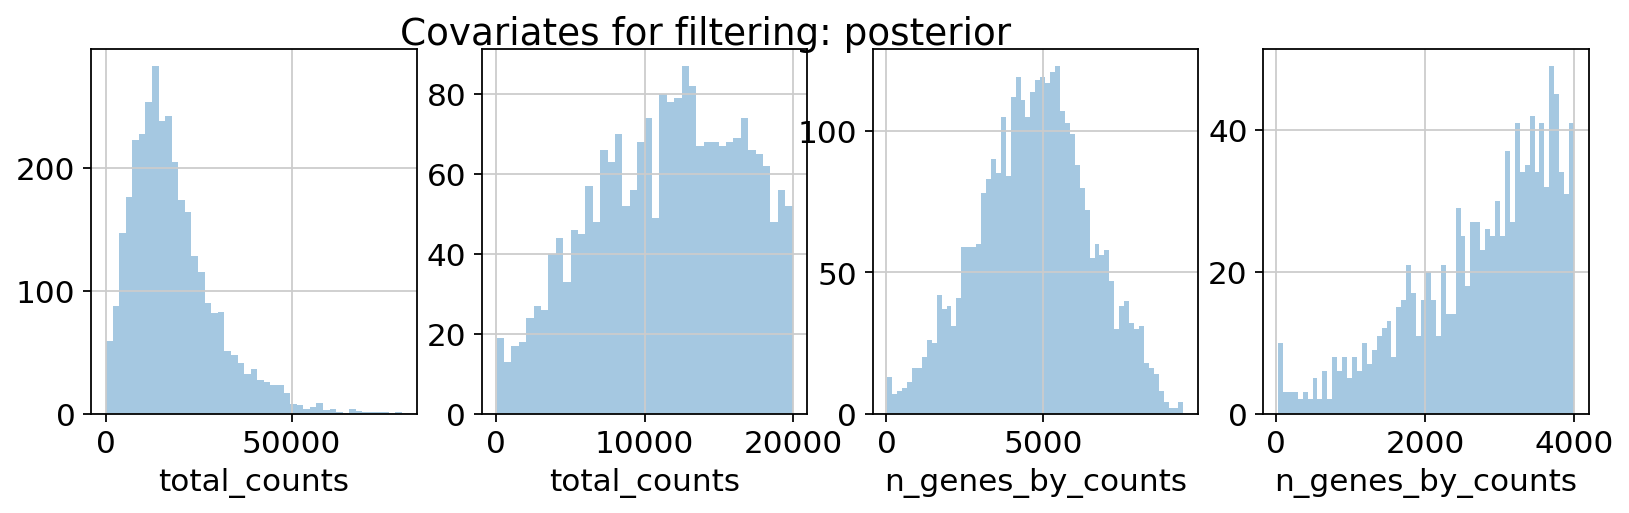

In [6]:
for name, adata in [
    ("anterior", adata_spatial_anterior),
    ("posterior", adata_spatial_posterior),
]:
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    fig.suptitle(f"Covariates for filtering: {name}")

    sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
    sns.distplot(
        adata.obs["total_counts"][adata.obs["total_counts"] < 20000],
        kde=False,
        bins=40,
        ax=axs[1],
    )
    sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
    sns.distplot(
        adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
        kde=False,
        bins=60,
        ax=axs[3],
    )

In [7]:
for adata in [
    adata_spatial_anterior,
    adata_spatial_posterior,
]:
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [8]:
adatas = [adata_spatial_anterior, adata_spatial_posterior]
adatas_cor = scanorama.correct_scanpy(adatas, return_dimred=True)

Found 32285 genes among all datasets
[[0.        0.4852459]
 [0.        0.       ]]
Processing datasets (0, 1)


In [9]:
adata_spatial = adatas_cor[0].concatenate(
    adatas_cor[1],
    batch_key='library_id', 
    uns_merge='unique',
    batch_categories=[
                      k
                      for d in [
                                adatas_cor[0].uns['spatial'],
                                adatas_cor[1].uns['spatial'],
                      ]
                      for k, v in d.items()
    ],
)

In [12]:
! pip install leidenalg
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.tl.leiden(adata_spatial, key_added="clusters")

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 3.2 MB 14.1 MB/s 
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)
running Leiden clustering
    finished: found 24 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'feature_types' as categorical
... storing 'genome' as categorical


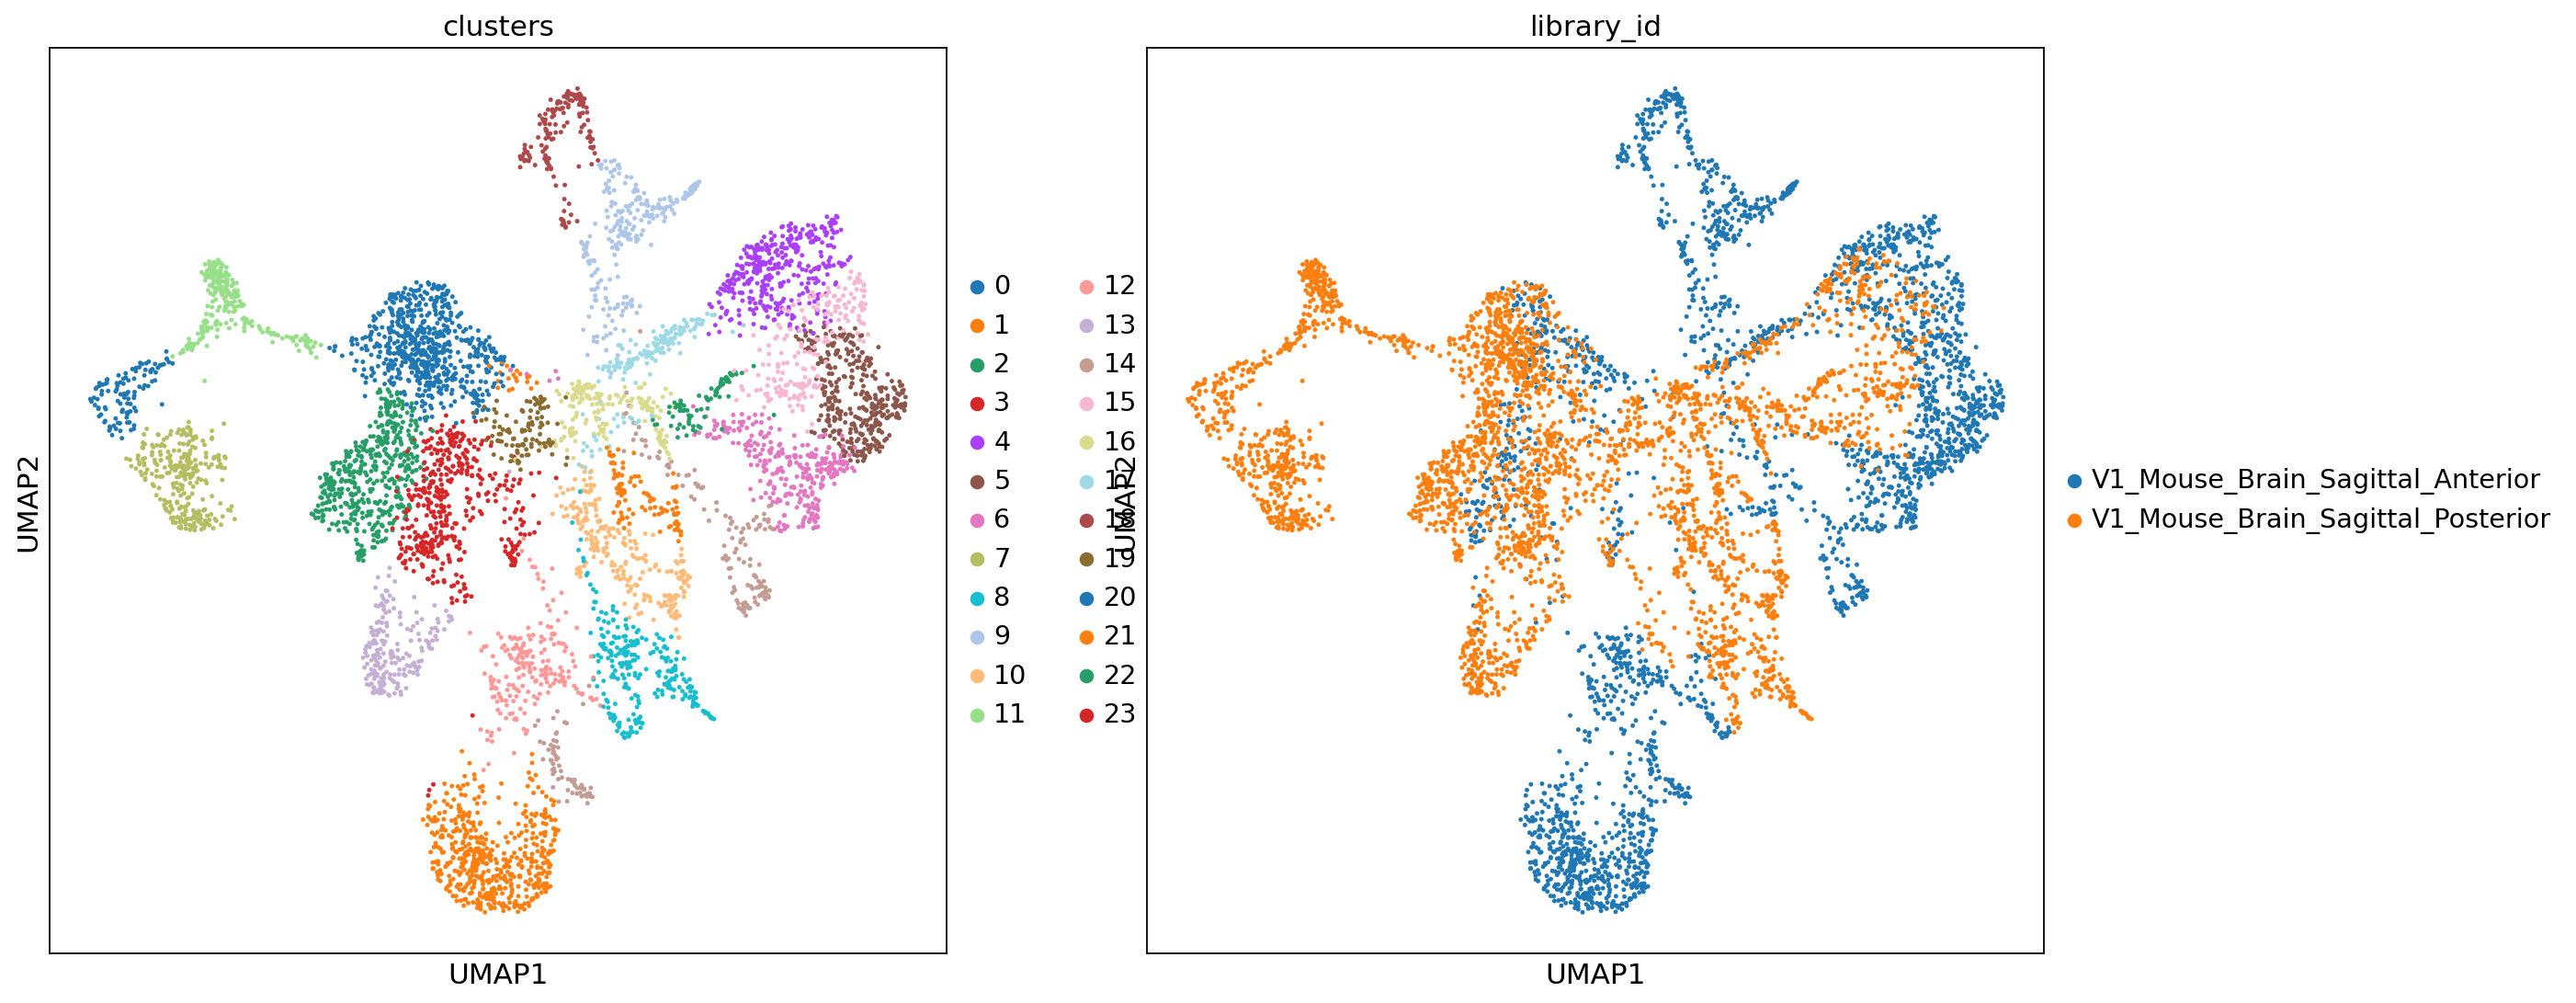

In [13]:
sc.pl.umap(
    adata_spatial, color=["clusters", "library_id"], palette=sc.pl.palettes.default_20
)

In [14]:
clusters_colors = dict(
    zip([str(i) for i in range(18)], adata_spatial.uns["clusters_colors"])
)

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for i, library in enumerate(
    ["V1_Mouse_Brain_Sagittal_Anterior", "V1_Mouse_Brain_Sagittal_Posterior"]
):
    ad = adata_spatial[adata_spatial.obs.library_id == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=library,
        color="clusters",
        size=1.5,
        palette=[
            v
            for k, v in clusters_colors.items()
            if k in ad.obs.clusters.unique().tolist()
        ],
        legend_loc=None,
        show=False,
        ax=axs[i],
    )

plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

From the clusters, we can clearly see the stratification of the cortical layer in both of the tissues (see the Allen brain atlas for reference). Furthermore, it seems that the dataset integration worked well, since there is a clear continuity between clusters in the two tissues.

In [16]:
! wget https://hmgubox.helmholtz-muenchen.de/f/4ef254675e2a41f89835/?dl=1

--2021-08-23 13:12:45--  https://hmgubox.helmholtz-muenchen.de/f/4ef254675e2a41f89835/?dl=1
Resolving hmgubox.helmholtz-muenchen.de (hmgubox.helmholtz-muenchen.de)... 146.107.6.220
Connecting to hmgubox.helmholtz-muenchen.de (hmgubox.helmholtz-muenchen.de)|146.107.6.220|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://hmgubox.helmholtz-muenchen.de/seafhttp/files/5f33f447-cba9-414c-8598-bdac9375a959/adata_processed_sc.h5ad [following]
--2021-08-23 13:12:46--  https://hmgubox.helmholtz-muenchen.de/seafhttp/files/5f33f447-cba9-414c-8598-bdac9375a959/adata_processed_sc.h5ad
Reusing existing connection to hmgubox.helmholtz-muenchen.de:443.
HTTP request sent, awaiting response... 200 OK
Length: 3301439501 (3.1G) [application/octet-stream]
Saving to: ‘index.html?dl=1’

index.html?dl=1     100%[===================>]   3.07G  26.7MB/s    in 2m 10s  

2021-08-23 13:14:56 (24.2 MB/s) - ‘index.html?dl=1’ saved [3301439501/3301439501]



In [17]:
! mv index.html?dl=1 adata_processed.h5ad

In [18]:
# perform intergation of scRNA-seq dataset and spatial transcriptomic dataset
# this allows us to transfer cell type labels to the Visium dataset, which were identified from the scRNA-seq dataset
adata_cortex = sc.read('adata_processed.h5ad')

/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [19]:
# subset the spatial anndata to (approximately) selects only spots belonging to the cortex
adata_anterior_subset = adata_spatial_anterior[
    adata_spatial_anterior.obsm["spatial"][:, 1] < 6000, :
]
adata_posterior_subset = adata_spatial_posterior[
    (adata_spatial_posterior.obsm["spatial"][:, 1] < 4000)
    & (adata_spatial_posterior.obsm["spatial"][:, 0] < 6000),
    :,
]

In [ ]:
adatas_anterior = [adata_cortex, adata_anterior_subset]
adatas_posterior = [adata_cortex, adata_posterior_subset]


# Integration.
integrated_anterior, corrected_anterior = scanorama.correct_scanpy(
    adatas_anterior, return_dimred=True
)
integrated_posterior, corrected_posterior = scanorama.correct_scanpy(
    adatas_posterior, return_dimred=True
)

Found 20538 genes among all datasets
[[0.         0.26086957]
 [0.         0.        ]]
Processing datasets (0, 1)


Concatenate datasets and assign integrated embeddings to anndata objects.

Notice that we are concatenating datasets with the join="outer" and uns_merge="first" strategies. This is because we want to keep the obsm['coords'] as well as the images of the visium datasets.

In [ ]:
adata_cortex_anterior = adata_cortex.concatenate(
    adata_anterior_subset,
    batch_key="dataset",
    batch_categories=["smart-seq", "visium"],
    join="outer",
    uns_merge="first",
)
adata_cortex_posterior = adata_cortex.concatenate(
    adata_posterior_subset,
    batch_key="dataset",
    batch_categories=["smart-seq", "visium"],
    join="outer",
    uns_merge="first",
)

In [ ]:
embedding_anterior = np.concatenate(integrated_anterior, axis=0)
adata_cortex_anterior.obsm["scanorama_embedding"] = embedding_anterior

embedding_posterior = np.concatenate(integrated_posterior, axis=0)
adata_cortex_posterior.obsm["scanorama_embedding"] = embedding_posterior

At this step, we have integrated each visium dataset in a common embedding with the scRNA-seq dataset. In such embedding space, we can compute distances between samples and use such distances as weights to be used for for propagating labels from the scRNA-seq dataset to the Visium dataset.

Such approach is very similar to the TransferData function in Seurat (see paper). Here, we re-implement the label transfer function with a simple python function, see below.

Frist, let’s compute cosine distances between the visium dataset and the scRNA-seq dataset, in the common embedding space

In [ ]:
from sklearn.metrics.pairwise import cosine_distances

distances_anterior = 1 - cosine_distances(
    adata_cortex_anterior[adata_cortex_anterior.obs.dataset == "smart-seq"].obsm[
        "scanorama_embedding"
    ],
    adata_cortex_anterior[adata_cortex_anterior.obs.dataset == "visium"].obsm[
        "scanorama_embedding"
    ],
)
distances_posterior = 1 - cosine_distances(
    adata_cortex_posterior[adata_cortex_posterior.obs.dataset == "smart-seq"].obsm[
        "scanorama_embedding"
    ],
    adata_cortex_posterior[adata_cortex_posterior.obs.dataset == "visium"].obsm[
        "scanorama_embedding"
    ],
)

In [ ]:
# propagate labels
def label_transfer(dist, labels):
    lab = pd.get_dummies(labels).to_numpy().T
    class_prob = lab @ dist
    norm = np.linalg.norm(class_prob, 2, axis=0)
    class_prob = class_prob / norm
    class_prob = (class_prob.T - class_prob.min(1)) / class_prob.ptp(1)
    return class_prob

In [ ]:
class_prob_anterior = label_transfer(distances_anterior, adata_cortex.obs.cell_subclass)
class_prob_posterior = label_transfer(
    distances_posterior, adata_cortex.obs.cell_subclass
)

In [ ]:
cp_anterior_df = pd.DataFrame(
    class_prob_anterior, columns=np.sort(adata_cortex.obs.cell_subclass.unique())
)
cp_posterior_df = pd.DataFrame(
    class_prob_posterior, columns=np.sort(adata_cortex.obs.cell_subclass.unique())
)

cp_anterior_df.index = adata_anterior_subset.obs.index
cp_posterior_df.index = adata_posterior_subset.obs.index


In [ ]:
sc.pl.spatial(
    adata_anterior_subset_transfer,
    img_key="hires",
    color=["L2/3 IT", "L4", "L5 PT", "L6 CT"],
    size=1.5,
)
sc.pl.spatial(
    adata_posterior_subset_transfer,
    img_key="hires",
    color=["L2/3 IT", "L4", "L5 PT", "L6 CT"],
    size=1.5,
)

In [ ]:
sc.pl.spatial(
    adata_anterior_subset_transfer, img_key="hires", color=["Oligo", "Astro"], size=1.5
)
sc.pl.spatial(
    adata_posterior_subset_transfer, img_key="hires", color=["Oligo", "Astro"], size=1.5
)